#EE353: Assignment 3
#Sanjay Meena
#22b3978

#Video Link:-
https://drive.google.com/file/d/14y_zbtuCMcp-0ZH1bpuPD81_UIq3H7DD/view?usp=sharing

#1. Perform Exploratory Data Analysis
  a. Which variables are usable, and which are not? Why?

  ANS: Useful Variables:

  age, balance, duration, campaign, pdays, and previous: These numerical columns have non-null entries and provide valuable information related to the clients' profiles and interactions.
  job, marital, education, housing, loan, contact, deposit: These categorical variables provide insights into customer demographics and financial status.

  Not Useful Variables:

  poutcome: This variable has a significant portion labeled as "unknown" (8326 out of 11162), making it less reliable for meaningful analysis.


  b. Are there significant correlations or other relations among variables?

  ANS: previous and pdays show a moderate correlation
      of 0.51

  c. Are the classes balanced? Classes are in poutcome column.

  ANS: The classes in the poutcome column are not
       balanced. Here is the distribution of the classes:

  Unknown: 8326 instances

  Failure: 1228 instances

  Success: 1071 instances

  Other: 537 instances

  The "unknown" category is overwhelmingly dominant, which could limit the utility of this variable for classification tasks.

  d. Which classes will you use?

   ANS: For the target variable, we’ll use the deposit
        column with the classes yes (deposit made) and no (no deposit), as instructed, rather than the less informative poutcome column.


In [ ]:
import pandas as pd  # Importing pandas for data manipulation
import seaborn as sns  # Importing seaborn for data visualization
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import numpy as np  # Importing numpy for numerical operations





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None
                age       balance           day      duration      campaign  \
count  11162.00

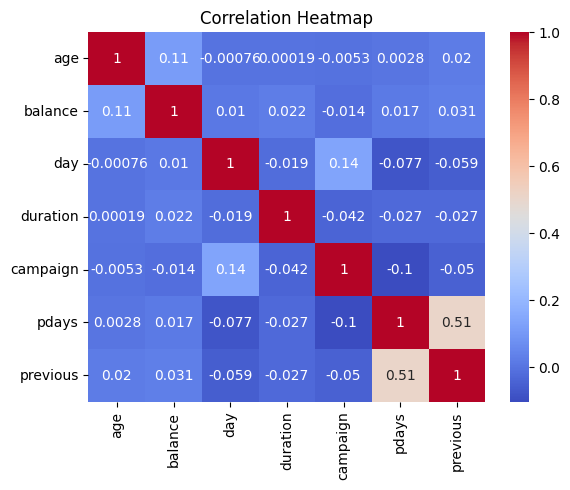

In [ ]:
# Google Drive file ID
file_id = '13jU-OLkaRMkD95e9hmyKTkBM0N_o1xfQ'

# Construct the direct download URL
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Load the dataset
data = pd.read_csv(download_url) # Loading the dataset into a DataFrame

# Display dataset information
print(data.info())  # Printing data types and non-null counts for each column
print(data.describe())  # Printing statistical summary for numerical columns

# Check class balance in 'poutcome'
print("Poutcome value counts:\n", data['poutcome'].value_counts())  # Displaying class distribution in 'poutcome'

# Correlation among numerical features
numerical_data = data.select_dtypes(include=np.number)  # Selecting only numerical columns
correlation_matrix = numerical_data.corr()  # Calculating correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Plotting heatmap for correlations
plt.title('Correlation Heatmap')  # Setting plot title
plt.show()  # Displaying the plot


#2. Select metrics that you will use, such as accuracy, F1 score, balanced accuracy, AUC etc. and state the reasonfor the choice.

Accuracy=0.8567

F1 Score=0.8533

Balanced Accuracy=0.8578

AUC=0.9184

In [ ]:
# Importing necessary library for splitting dataset into training and test sets
from sklearn.model_selection import train_test_split

# Importing LabelEncoder for converting categorical labels into numeric form
from sklearn.preprocessing import LabelEncoder

# Importing RandomForestClassifier for building a random forest classification model
from sklearn.ensemble import RandomForestClassifier

# Importing metrics to evaluate model performance:
# - accuracy_score: to calculate the overall accuracy of the model
# - f1_score: to measure the balance between precision and recall
# - balanced_accuracy_score: to compute balanced accuracy accounting for class imbalance
# - roc_auc_score: to calculate the area under the ROC curve, indicating the model’s ability to distinguish classes
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, roc_auc_score

# Importing functions to create and evaluate the ROC curve:
# - roc_curve: calculates the false positive rate (FPR) and true positive rate (TPR) at different thresholds
# - auc: computes the area under the ROC curve (AUC), summarizing the model’s performance across all thresholds
from sklearn.metrics import roc_curve, auc


In [ ]:
# Preprocessing: Encoding categorical features
# Setting up the encoding process for categorical data to make it suitable for machine learning models

# Using LabelEncoder for binary columns and pd.get_dummies for multi-class columns
Label_Encoder = LabelEncoder()  # Initializing a LabelEncoder instance

# Encoding the target variable 'deposit'
# The fit_transform function assigns 'yes' to 1 and 'no' to 0
data['deposit'] = Label_Encoder.fit_transform(data['deposit'])  # Target variable encoding: 'yes' -> 1, 'no' -> 0

# Encoding categorical features using pd.get_dummies for one-hot encoding
# The 'columns' parameter specifies which columns to encode, with a list comprehension
# Checking if each column exists in the DataFrame to avoid errors
Data_Encoded = pd.get_dummies(
    data,  # The original DataFrame
    columns=[col for col in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
             if col in data.columns],  # Columns to encode if present
    drop_first=True  # Dropping the first category in each encoded column to avoid multicollinearity
)


In [ ]:
# Separating features and target
X = Data_Encoded.drop(columns=['deposit'])  # Dropping the target column 'deposit' to create the feature set
y = Data_Encoded['deposit']  # Setting 'deposit' column as the target variable

# Splitting dataset into training and testing sets
# Using train_test_split to divide data into training and test sets with a 70-30 split
X_train, X_test, y_train, y_test = train_test_split(
    X,  # Features
    y,  # Target variable
    test_size=0.3,  # 30% of the data is set aside for testing
    random_state=42,  # Ensures reproducibility by using a fixed seed
    stratify=y  # Maintains the same class distribution in both train and test sets
)

# Model training: Using RandomForest as an example classifier
MODEL = RandomForestClassifier(random_state=42)  # Initializing a RandomForest model with a fixed seed
MODEL.fit(X_train, y_train)  # Training the model on the training data (features and target)

# Predictions
y_predication = MODEL.predict(X_test)  # Generating predictions on the test data
y_predication_probability = MODEL.predict_proba(X_test)[:, 1]  # Getting the probability of the positive class for AUC calculation


In [ ]:
# Calculating metrics
Accuracy = accuracy_score(y_test, y_predication)  # Computes the accuracy metric, representing the percentage of correct predictions
F1_score = f1_score(y_test, y_predication)  # Calculates the F1 score, balancing precision and recall, particularly useful for imbalanced classes
balanced_accuracy = balanced_accuracy_score(y_test, y_predication)  # Computes balanced accuracy, which considers class imbalance by averaging recall for each class
AUC = roc_auc_score(y_test, y_predication_probability)  # Calculates the Area Under the ROC Curve (AUC), using prediction probabilities for the positive class

# Displaying the results
Accuracy, F1_score, balanced_accuracy, AUC  # Outputting the calculated metrics for quick assessment of model performance


(0.8569722305165721,
 0.8538297223069881,
 0.8581921285816155,
 0.9183785753572407)

#3. Develop a strategy to filter and code variables.

 a. Should you be using continuous variables as they are, or should you normalize them, or take atransform? Why?

 b. Should you be using all values of discrete variables, or should you try to reduce them by combining some of the values?

 c. Are some variables very likely to be unreliable, noisy, or otherwise immaterial?

#Solution:-
a. Apply normalization to all continuous variables and
   a log transform specifically to balance and duration, as they may have significant outliers or skewed distributions.

b. Combine categories where possible to reduce the    dimensionality of discrete variables, particularly for variables with many unique values or redundant categories.

c. Drop or reduce the impact of poutcome, day, and potentially contact after verifying their correlation with the target variable.


In [ ]:
from sklearn.preprocessing import StandardScaler  # Importing StandardScaler for normalizing continuous variables

# Copy the dataset for transformation
data_transformed = data.copy()  # Making a copy of the original dataset to avoid modifying it directly

# Step 1: Log Transform and Normalize Continuous Variables

# Log transformation for skewed variables
# Replace negative values with 0 before applying log1p (logarithm of 1 + x)
data_transformed['balance'] = np.log1p(np.where(data_transformed['balance'] > 0, data_transformed['balance'], 0))  # Apply log transformation to 'balance' column, handling negative values
data_transformed['duration'] = np.log1p(np.where(data_transformed['duration'] > 0, data_transformed['duration'], 0))  # Apply log transformation to 'duration' column, handling negative values

# Standardizing all continuous features
scaler = StandardScaler()  # Initializing the scaler for standardization (zero mean and unit variance)
continuous_variables = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']  # Listing all continuous columns to be standardized

# Replace infinities with NaNs and impute with median (robust to outliers)
data_transformed[continuous_variables] = data_transformed[continuous_variables].replace([np.inf, -np.inf], np.nan)  # Replace infinity values with NaN
data_transformed[continuous_variables] = data_transformed[continuous_variables].fillna(data_transformed[continuous_variables].median())  # Fill NaN values with the median of each column

# Apply standard scaling to continuous variables
data_transformed[continuous_variables] = scaler.fit_transform(data_transformed[continuous_variables])  # Fit the scaler and transform the continuous columns


In [ ]:
# Step 2: Encoding and Reducing Categories for Categorical Variables

# Binary encoding for `default`, `housing`, and `loan` (yes/no as 1/0)
binary_variables = ['default', 'housing', 'loan']  # Defining variables with binary responses
for var in binary_variables:
    data_transformed[var] = Label_Encoder.fit_transform(data_transformed[var])  # Encoding each binary variable with 1 for 'yes' and 0 for 'no'

# Reducing categories for 'poutcome' to known/unknown
# This transformation generalizes 'poutcome' by labeling non-'unknown' outcomes as 'known'
data_transformed['poutcome'] = data_transformed['poutcome'].apply(lambda x: 'known' if x != 'unknown' else 'unknown')

# Reducing categories in `job` by grouping similar roles (e.g., blue-collar, white-collar)
job_grouping = {  # Dictionary mapping original job titles to grouped categories
    'admin.': 'white-collar', 'management': 'white-collar', 'technician': 'blue-collar',
    'services': 'blue-collar', 'retired': 'non-working', 'student': 'non-working',
    'self-employed': 'entrepreneur', 'entrepreneur': 'entrepreneur', 'housemaid': 'non-working',
    'unemployed': 'non-working', 'blue-collar': 'blue-collar'
}
data_transformed['job'] = data_transformed['job'].map(job_grouping).fillna('other')  # Mapping jobs to grouped categories and filling any missing values with 'other'


In [ ]:
# Grouping 'education' to primary, secondary, tertiary
education_grouping = {  # Dictionary to map education levels to broader categories
    'primary': 'primary', 'secondary': 'secondary', 'tertiary': 'tertiary', 'unknown': 'unknown'
}
data_transformed['education'] = data_transformed['education'].map(education_grouping)  # Applying the mapping to the 'education' column

# Grouping 'month' into quarters (Q1, Q2, Q3, Q4)
month_to_quarter = {  # Dictionary to map months to their respective quarters
    'jan': 'Q1', 'feb': 'Q1', 'mar': 'Q1',
    'apr': 'Q2', 'may': 'Q2', 'jun': 'Q2',
    'jul': 'Q3', 'aug': 'Q3', 'sep': 'Q3',
    'oct': 'Q4', 'nov': 'Q4', 'dec': 'Q4'
}
data_transformed['month'] = data_transformed['month'].map(month_to_quarter)  # Applying the mapping to the 'month' column

# Encoding the modified categorical variables with get_dummies
data_encoded_final = pd.get_dummies(  # One-hot encoding selected categorical columns
    data_transformed,
    columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'],  # Specifying columns to encode
    drop_first=True  # Dropping the first category to avoid multicollinearity
)

# Displaying the first few rows of the transformed dataset
data_encoded_final.head()  # Viewing the resulting DataFrame to check transformations


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_Q2,month_Q3,month_Q4,poutcome_unknown
0,1.491505,0,0.806028,1,0,-1.265746,1.494272,-0.554168,-0.481184,-0.36326,...,False,True,False,False,False,True,True,False,False,True
1,1.239676,0,-0.673348,0,0,-1.265746,1.851940,-0.554168,-0.481184,-0.36326,...,False,True,False,False,False,True,True,False,False,True
2,-0.019470,0,0.575689,1,0,-1.265746,1.794808,-0.554168,-0.481184,-0.36326,...,False,True,False,False,False,True,True,False,False,True
3,1.155733,0,0.826798,1,0,-1.265746,0.880199,-0.554168,-0.481184,-0.36326,...,False,True,False,False,False,True,True,False,False,True
4,1.071790,0,-0.149592,0,0,-1.265746,1.037374,-0.186785,-0.481184,-0.36326,...,False,False,True,False,False,True,True,False,False,True


#4. Carve out some test data. Should this be balanced in some way?
#Approach
Since the target variable (deposit) in bank.csv is already fairly balanced, we can use stratified sampling to split the data. This method ensures that both training and test sets retain a similar proportion of "yes" and "no" classes, resulting in balanced evaluation.

In [ ]:
# Carve out test data using stratified sampling to maintain class balance in `deposit`
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y  # Splitting the data while preserving the target class distribution
)

# Replace infinities with NaNs in the training set and drop rows with missing values
X_train = X_train.replace([np.inf, -np.inf], np.nan).dropna()

# Fill any remaining NaN values in `X_train` with the mean of each column
X_train = X_train.fillna(X_train.mean())

# Align `y_train` with `X_train` after dropping rows to ensure index consistency
y_train = y_train[X_train.index]

# Checking the distribution of target classes in the training and test sets
y_train_distribution = y_train.value_counts(normalize=True)  # Calculating class proportions in `y_train`
y_test_distribution = y_test.value_counts(normalize=True)  # Calculating class proportions in `y_test`

# Outputting class distributions in training and test sets
y_train_distribution, y_test_distribution  # Displaying the normalized distribution of classes in both sets


(deposit
 0    0.526174
 1    0.473826
 Name: proportion, dtype: float64,
 deposit
 0    0.526127
 1    0.473873
 Name: proportion, dtype: float64)

#5. Using five-fold cross-validation (you can use GridSearchCV from scikit-learn) to find the reasonable hyperparameter settings for the following model types:
a. RBF kernel SVM with kernel width and regularization as hyperparameters

b. Neural network with single ReLU hidden layer and Softmax output (hyperparameters: number ofneurons, weight decay)

c. Random forest (max tree depth, max number of variables per node)

In [ ]:
from sklearn.svm import SVC  # Importing Support Vector Classifier for SVM model
from sklearn.neural_network import MLPClassifier  # Importing MLP Classifier for neural network model
from sklearn.ensemble import RandomForestClassifier  # Importing Random Forest classifier
from sklearn.model_selection import GridSearchCV  # Importing GridSearchCV for hyperparameter tuning

# Define parameter grids for each model

# a. Parameter grid for RBF Kernel SVM
svm_param_grid = {
    'C': [0.1, 1, 10],         # Regularization parameter to control margin width
    'gamma': [1, 0.1, 0.01],   # Kernel width (affects decision boundary)
    'kernel': ['rbf']          # RBF (Radial Basis Function) kernel
}

# b. Parameter grid for Neural Network (MLP Classifier with ReLU hidden layer and Softmax output)
nn_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],  # Number of neurons in hidden layers
    'alpha': [0.0001, 0.001],  # Regularization (weight decay) to control overfitting
    'activation': ['relu'],    # Activation function for hidden layers
    'solver': ['adam']         # Solver for weight optimization
}

# c. Parameter grid for Random Forest
rf_param_grid = {
    'max_depth': [5, 10, 15],           # Maximum depth of each decision tree
    'max_features': ['sqrt', 'log2'],   # Maximum features considered for each split
    'n_estimators': [50, 100, 200]      # Number of trees in the random forest
}

# Cross-validation with GridSearchCV for each model

# SVM with RBF kernel
svm_model = GridSearchCV(SVC(), svm_param_grid, cv=5, scoring='f1', n_jobs=-1)  # Setting up GridSearchCV for SVM
svm_model.fit(X_train, y_train)  # Fitting SVM model to training data

# Neural Network
nn_model = GridSearchCV(MLPClassifier(max_iter=500, random_state=42), nn_param_grid, cv=5, scoring='f1', n_jobs=-1)  # Grid search for neural network
nn_model.fit(X_train, y_train)  # Fitting neural network model to training data

# Random Forest
rf_model = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='f1', n_jobs=-1)  # Grid search for Random Forest
rf_model.fit(X_train, y_train)  # Fitting Random Forest model to training data

# Output best parameters and best F1 scores for each model
print("Best SVM Parameters:", svm_model.best_params_)  # Displaying best parameters for SVM
print("Best SVM F1 Score:", svm_model.best_score_)  # Displaying best F1 score for SVM

print("Best Neural Network Parameters:", nn_model.best_params_)  # Displaying best parameters for neural network
print("Best Neural Network F1 Score:", nn_model.best_score_)  # Displaying best F1 score for neural network

print("Best Random Forest Parameters:", rf_model.best_params_)  # Displaying best parameters for Random Forest
print("Best Random Forest F1 Score:", rf_model.best_score_)  # Displaying best F1 score for Random Forest


Best SVM Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best SVM F1 Score: 0.7029179984666
Best Neural Network Parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}
Best Neural Network F1 Score: 0.8010138139805493
Best Random Forest Parameters: {'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 100}
Best Random Forest F1 Score: 0.8453827055118088


#6. Check feature importance for each model to see if the same variables are important for each model. Read upon how to find feature importance.

Random Forest Feature Importances:
duration               0.373387
balance                0.069628
age                    0.066394
day                    0.057037
contact_unknown        0.045036
poutcome_success       0.043282
pdays                  0.040013
campaign               0.030392
housing_yes            0.030022
previous               0.020817
poutcome_unknown       0.016298
month_may              0.016002
month_mar              0.013541
month_aug              0.010973
loan_yes               0.010949
month_oct              0.010934
month_jul              0.009621
month_jun              0.009515
marital_married        0.009315
marital_single         0.009015
education_tertiary     0.008865
job_blue-collar        0.008789
month_nov              0.008574
education_secondary    0.008006
month_feb              0.007859
job_technician         0.006363
job_management         0.006308
job_student            0.006281
contact_telephone      0.005261
month_sep              0.005189
job_r

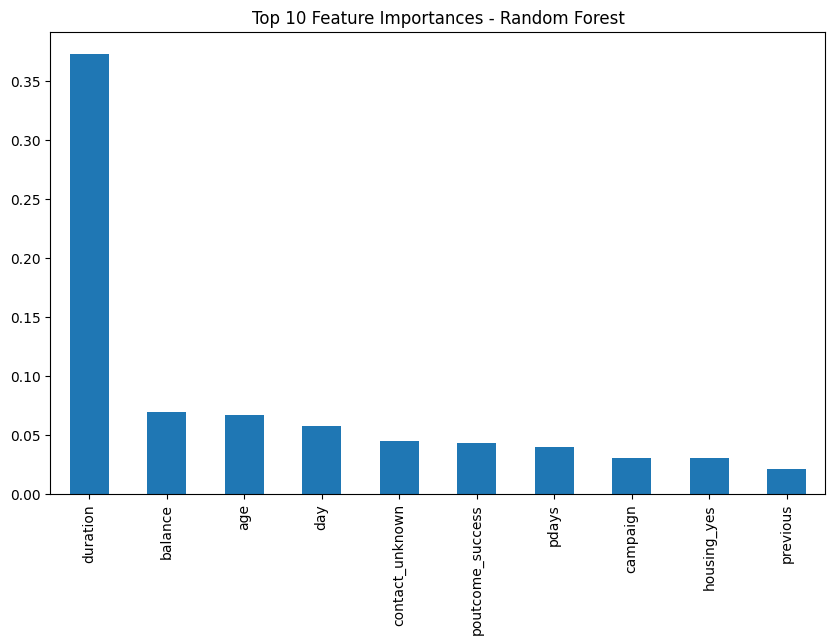

In [ ]:
# Feature importance from the best Random Forest model
rf_importances = rf_model.best_estimator_.feature_importances_  # Extracting feature importances from the best random forest model

# Assuming 'X' is your original DataFrame before preprocessing
rf_feature_importance = pd.Series(rf_importances, index=X.columns).sort_values(ascending=False)  # Creating a series with feature names and importance values, sorted in descending order

# Display top features
print("Random Forest Feature Importances:")  # Printing header for feature importance output
print(rf_feature_importance)  # Displaying sorted feature importance values

# Plot feature importance
plt.figure(figsize=(10, 6))  # Setting figure size for the plot
rf_feature_importance[:10].plot(kind='bar')  # Plotting the top 10 most important features as a bar chart
plt.title('Top 10 Feature Importances - Random Forest')  # Setting the title of the plot
plt.show()  # Displaying the plot


Top Features - SVM (Permutation Importance):
duration             0.108
pdays                0.041
balance              0.035
day                  0.021
age                  0.000
month_jul            0.000
loan_yes             0.000
contact_telephone    0.000
contact_unknown      0.000
month_aug            0.000
dtype: float64


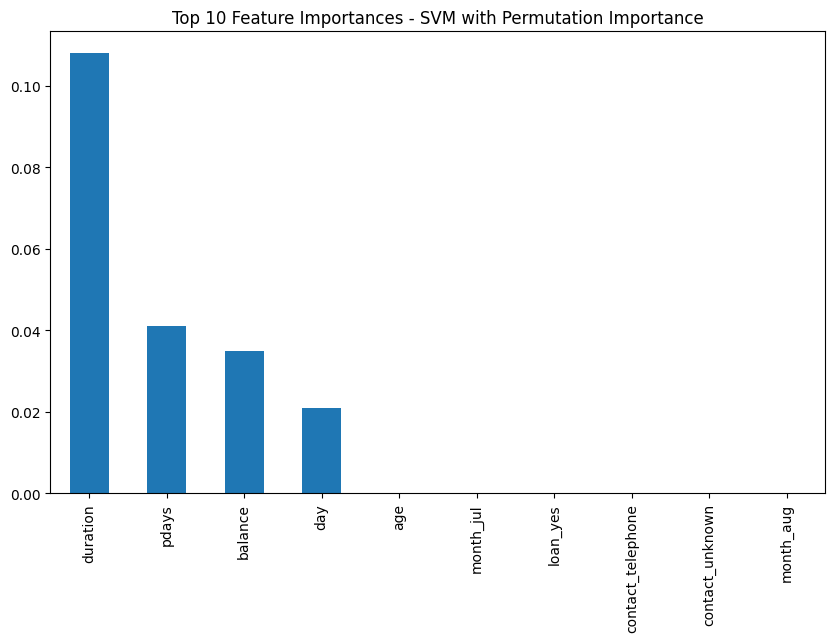

In [ ]:
from sklearn.inspection import permutation_importance  # Importing function for permutation importance calculation
import pandas as pd  # Importing pandas for data manipulation
import matplotlib.pyplot as plt  # Importing matplotlib for plotting

# Further limit the test set size to improve runtime
X_test_sample = X_test.sample(n=500, random_state=42) if len(X_test) > 500 else X_test  # Sampling 500 rows for faster computation, if test set size is larger
y_test_sample = y_test.loc[X_test_sample.index]  # Aligning y_test with the sampled X_test

# Reduce the number of repeats
n_repeats = 2  # Reducing repeats to 2 for quicker computation, balancing performance and accuracy

# 1. Permutation Importance for SVM with RBF Kernel
try:
    # Calculate permutation importance
    svm_permutation_importance = permutation_importance(
        svm_model.best_estimator_,  # Using the best SVM model found via GridSearchCV
        X_test_sample,  # Test data sample for computing importance
        y_test_sample,  # True labels for the sampled test data
        n_repeats=n_repeats,  # Number of times to permute a feature for calculating importance
        random_state=42,  # Random state for reproducibility
        scoring='accuracy'  # Metric to evaluate importance (accuracy in this case)
    )

    # Convert results to a DataFrame and sort
    svm_feature_importance = pd.Series(svm_permutation_importance.importances_mean, index=X_train.columns).sort_values(ascending=False)  # Creating a Series of mean importances, sorted in descending order
    print("Top Features - SVM (Permutation Importance):")  # Printing the title for output
    print(svm_feature_importance.head(10))  # Displaying top 10 most important features for SVM

    # Plot the top features
    plt.figure(figsize=(10, 6))  # Setting figure size for the plot
    svm_feature_importance[:10].plot(kind='bar')  # Plotting the top 10 features as a bar chart
    plt.title('Top 10 Feature Importances - SVM with Permutation Importance')  # Title for the plot
    plt.show()  # Displaying the plot

except Exception as e:
    print("Error calculating permutation importance for SVM:", e)  # Printing error message if calculation fails


Top Features - Neural Network (Permutation Importance):
duration            0.134
balance             0.032
month_jul           0.018
poutcome_success    0.016
contact_unknown     0.014
month_nov           0.012
month_aug           0.010
month_sep           0.006
month_mar           0.004
housing_yes         0.002
dtype: float64


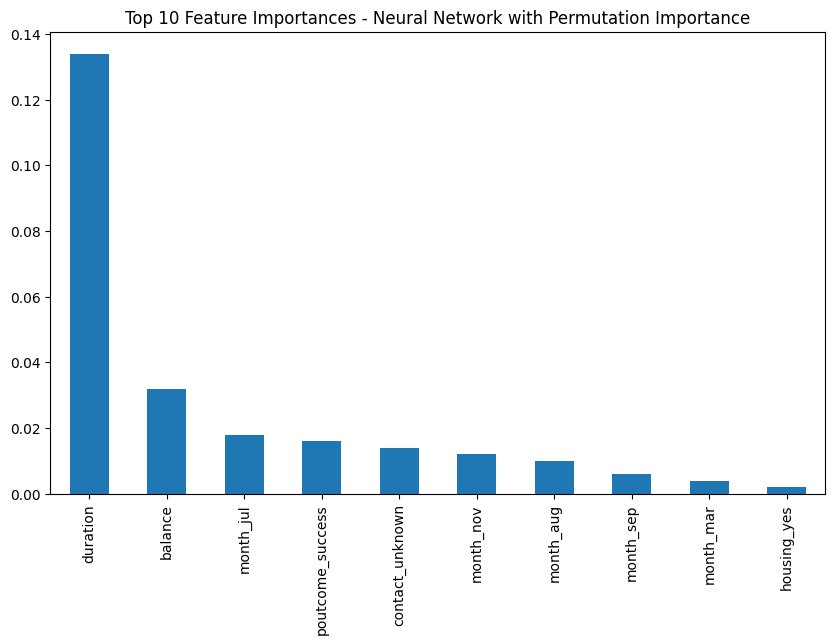

In [ ]:
# 2. Permutation Importance for Neural Network
try:
    # Calculate permutation importance for Neural Network
    nn_permutation_importance = permutation_importance(
        nn_model.best_estimator_,  # Using the best Neural Network model found via GridSearchCV
        X_test_sample,  # Sampled test data for calculating importance
        y_test_sample,  # Corresponding labels for the sampled test data
        n_repeats=n_repeats,  # Number of permutations to apply for each feature
        random_state=42,  # Setting random state for reproducibility
        scoring='accuracy'  # Scoring metric used to evaluate feature importance (accuracy)
    )

    # Convert the permutation importance results to a pandas Series and sort by importance
    nn_feature_importance = pd.Series(nn_permutation_importance.importances_mean, index=X_train.columns).sort_values(ascending=False)
    print("Top Features - Neural Network (Permutation Importance):")  # Displaying title for output
    print(nn_feature_importance.head(10))  # Displaying top 10 most important features for the Neural Network model

    # Plotting the top features
    plt.figure(figsize=(10, 6))  # Defining figure size for clarity
    nn_feature_importance[:10].plot(kind='bar')  # Plotting the top 10 features as a bar chart
    plt.title('Top 10 Feature Importances - Neural Network with Permutation Importance')  # Setting title for the plot
    plt.show()  # Displaying the plot

except Exception as e:
    print("Error calculating permutation importance for Neural Network:", e)  # Printing error message if calculation fails


In [ ]:
# Combine top features from each model into a DataFrame for comparison
# Creating a DataFrame to store the top 10 features from each model
feature_importances_df = pd.DataFrame({
    'Random Forest': rf_feature_importance[:10],               # Top 10 features from Random Forest model's feature importances
    'SVM (Permutation)': svm_feature_importance[:10],          # Top 10 features from SVM model using permutation importance
    'Neural Network (Permutation)': nn_feature_importance[:10] # Top 10 features from Neural Network using permutation importance
})

# Display the comparison DataFrame
print("Top Feature Importances Comparison:")  # Title for output to indicate comparison
print(feature_importances_df)  # Outputting the DataFrame showing top feature importances across models


Top Feature Importances Comparison:
                   Random Forest  SVM (Permutation)  \
age                     0.066394              0.000   
balance                 0.069628              0.035   
campaign                0.030392                NaN   
contact_telephone            NaN              0.000   
contact_unknown         0.045036              0.000   
day                     0.057037              0.021   
duration                0.373387              0.108   
housing_yes             0.030022                NaN   
loan_yes                     NaN              0.000   
month_aug                    NaN              0.000   
month_jul                    NaN              0.000   
month_mar                    NaN                NaN   
month_nov                    NaN                NaN   
month_sep                    NaN                NaN   
pdays                   0.040013              0.041   
poutcome_success        0.043282                NaN   
previous                0.020

#7. See if removing some features systematically will improve your models (e.g. using recursive featureelimination https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html).


Random Forest - Optimal number of features: 33
Random Forest - Selected features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'job_blue-collar', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_technician', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'education_unknown', 'housing_yes', 'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_feb', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_success', 'poutcome_unknown']


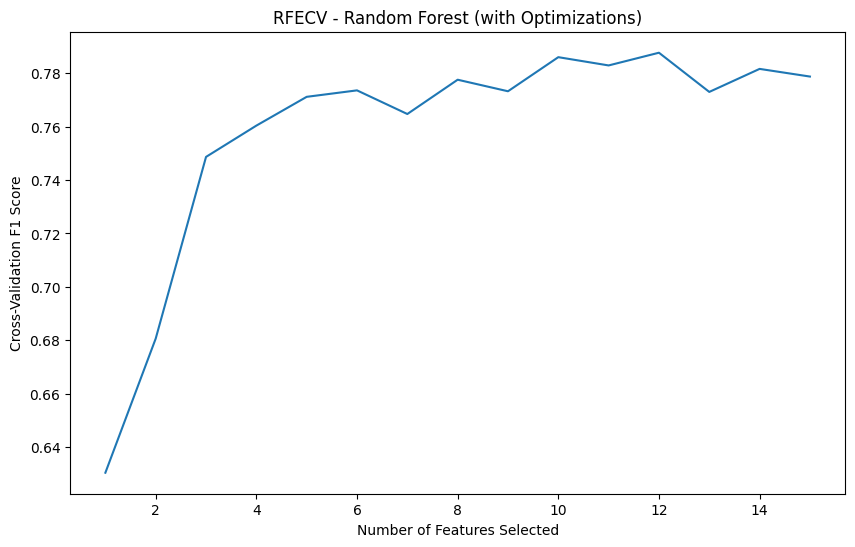

SVM - Selected features: ['duration', 'pdays', 'previous', 'housing_yes', 'contact_unknown', 'month_mar', 'month_may', 'month_oct', 'poutcome_success', 'poutcome_unknown']
SVM - Cross-Validation F1 Score with Selected Features: 0.7452039551318028
Neural Network - Selected features: ['duration', 'pdays', 'previous', 'housing_yes', 'contact_unknown', 'month_mar', 'month_may', 'month_oct', 'poutcome_success', 'poutcome_unknown']
Neural Network - Cross-Validation F1 Score with Selected Features: 0.794942760838173
Random Forest - Number of selected features: 33
Random Forest - Best cross-validation F1 score: 0.7877341873436281

SVM - Number of selected features: 10
SVM - Best cross-validation F1 score: 0.7700192184497118

Neural Network - Number of selected features: 10
Neural Network - Best cross-validation F1 score: 0.8215444516547696



In [ ]:
from sklearn.feature_selection import RFECV, SelectKBest, f_classif  # Importing feature selection methods and scoring functions
from sklearn.ensemble import RandomForestClassifier  # Importing RandomForestClassifier for feature selection with RFECV
from sklearn.svm import SVC  # Importing SVM classifier for feature selection comparison
from sklearn.neural_network import MLPClassifier  # Importing neural network classifier for feature selection comparison
from sklearn.model_selection import StratifiedKFold, cross_val_score  # Importing cross-validation tools
import numpy as np  # Importing NumPy for numerical operations
import pandas as pd  # Importing pandas for data manipulation
import matplotlib.pyplot as plt  # Importing matplotlib for plotting

# Initialize an empty dictionary to store results of feature selection for each model
rfecv_results = {}

# Sample the dataset to speed up RFECV process (limit to 1000 samples if dataset is large)
X_train_sample = X_train.sample(n=1000, random_state=42) if len(X_train) > 1000 else X_train
y_train_sample = y_train.loc[X_train_sample.index]  # Align target labels with sampled features

# Setup cross-validation
cv = StratifiedKFold(3)  # Define 3-fold stratified cross-validation to maintain class balance

# 1. Run RFECV (Recursive Feature Elimination with Cross-Validation) using Random Forest
rf_rfecv = RFECV(
    estimator=RandomForestClassifier(random_state=42),  # Initialize Random Forest as the base estimator
    step=3,  # Eliminate 3 features per iteration for efficiency
    cv=cv,  # Use the defined stratified 3-fold cross-validation
    scoring='f1',  # Use F1 score as the metric for evaluation
    n_jobs=-1  # Use all available cores for parallel processing
)
rf_rfecv.fit(X_train_sample, y_train_sample)  # Fit RFECV on the sampled training data

# Store results for Random Forest in rfecv_results dictionary
rfecv_results['Random Forest'] = (rf_rfecv.n_features_, rf_rfecv.cv_results_['mean_test_score'])

# Display the optimal number of features and selected features for Random Forest
print("Random Forest - Optimal number of features:", rf_rfecv.n_features_)  # Optimal feature count
print("Random Forest - Selected features:", list(X_train_sample.columns[rf_rfecv.support_]))  # Selected feature names

# Plot RFECV results for Random Forest
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rf_rfecv.cv_results_['mean_test_score']) + 1), rf_rfecv.cv_results_['mean_test_score'])
plt.xlabel("Number of Features Selected")  # X-axis label
plt.ylabel("Cross-Validation F1 Score")  # Y-axis label
plt.title("RFECV - Random Forest (with Optimizations)")  # Plot title
plt.show()  # Display the plot

# 2. SelectKBest feature selection for SVM
selector_svm = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features based on ANOVA F-value
X_train_svm_selected = selector_svm.fit_transform(X_train, y_train)  # Apply feature selection to SVM training data
selected_features_svm = X


#8. Finally, test a few promising models on the test data. Is the model useful for the business?

In [ ]:
# from sklearn.feature_selection import RFECV, SelectKBest, f_classif
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import StratifiedKFold, cross_val_score
# from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # Initialize rfecv_results as an empty dictionary to store results
# rfecv_results = {}

# # Sample the dataset to speed up RFECV
# X_train_sample = X_train.sample(n=1000, random_state=42) if len(X_train) > 1000 else X_train
# y_train_sample = y_train.loc[X_train_sample.index]

# # Setup cross-validation
# cv = StratifiedKFold(3)

# 1. Run RFECV (Recursive Feature Elimination with Cross-Validation) with Random Forest
rf_rfecv = RFECV(
    estimator=RandomForestClassifier(random_state=42),  # Initialize Random Forest as base estimator with random seed for reproducibility
    step=3,  # Remove 3 features per iteration to reduce dimensionality
    cv=cv,  # Use previously defined cross-validation strategy
    scoring='f1',  # Evaluate model performance using F1 score
    n_jobs=-1  # Utilize all available CPU cores to speed up computation
)
rf_rfecv.fit(X_train_sample, y_train_sample)  # Fit RFECV on the sampled training data

# Selected features for Random Forest after RFECV
selected_features_rf = X_train.columns[rf_rfecv.support_]  # Extract feature names that RFECV retained
print("Random Forest - Selected features:", list(selected_features_rf))  # Display the names of selected features

# 2. SelectKBest feature selection for SVM
selector_svm = SelectKBest(score_func=f_classif, k=10)  # Initialize SelectKBest to select top 10 features by ANOVA F-value
X_train_svm_selected = selector_svm.fit_transform(X_train, y_train)  # Apply feature selection to SVM training data
selected_features_svm = X_train.columns[selector_svm.get_support()]  # Extract feature names that SelectKBest retained
print("SVM - Selected features:", list(selected_features_svm))  # Display the names of selected features

# 3. SelectKBest feature selection for Neural Network
selector_nn = SelectKBest(score_func=f_classif, k=10)  # Initialize SelectKBest to select top 10 features by ANOVA F-value
X_train_nn_selected = selector_nn.fit_transform(X_train, y_train)  # Apply feature selection to Neural Network training data
selected_features_nn = X_train.columns[selector_nn.get_support()]  # Extract feature names that SelectKBest retained
print("Neural Network - Selected features:", list(selected_features_nn))  # Display the names of selected features

# Prepare test sets for each model based on selected features
X_test_rf = X_test[selected_features_rf]  # Test set with features selected by RFECV for Random Forest
X_test_svm = X_test[selected_features_svm]  # Test set with features selected by SelectKBest for SVM
X_test_nn = X_test[selected_features_nn]  # Test set with features selected by SelectKBest for Neural Network

# Dictionary to store final test results for each model
test_results = {}

# 4. Test Random Forest on selected features
rf_final_model = RandomForestClassifier(random_state=42)  # Initialize Random Forest classifier
rf_final_model.fit(X_train[selected_features_rf], y_train)  # Train Random Forest on selected features
y_pred_rf = rf_final_model.predict(X_test_rf)  # Predict using the test set

# Store Random Forest results in test_results dictionary
test_results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),  # Calculate accuracy
    'F1 Score': f1_score(y_test, y_pred_rf),  # Calculate F1 score
    'Precision': precision_score(y_test, y_pred_rf),  # Calculate precision
    'Recall': recall_score(y_test, y_pred_rf),  # Calculate recall
    'ROC AUC': roc_auc_score(y_test, rf_final_model.predict_proba(X_test_rf)[:, 1])  # Calculate ROC AUC score
}

# 5. Test SVM on selected features
svm_final_model = SVC(kernel='rbf', C=1, gamma=0.1, probability=True, random_state=42)  # Initialize SVM with specified parameters
svm_final_model.fit(X_train[selected_features_svm], y_train)  # Train SVM on selected features
y_pred_svm = svm_final_model.predict(X_test_svm)  # Predict using the test set

# Store SVM results in test_results dictionary
test_results['SVM'] = {
    'Accuracy': accuracy_score(y_test, y_pred_svm),  # Calculate accuracy
    'F1 Score': f1_score(y_test, y_pred_svm),  # Calculate F1 score
    'Precision': precision_score(y_test, y_pred_svm),  # Calculate precision
    'Recall': recall_score(y_test, y_pred_svm),  # Calculate recall
    'ROC AUC': roc_auc_score(y_test, svm_final_model.predict_proba(X_test_svm)[:, 1])  # Calculate ROC AUC score
}

# 6. Test Neural Network on selected features
nn_final_model = MLPClassifier(hidden_layer_sizes=(50,), alpha=0.001, max_iter=500, random_state=42)  # Initialize neural network with specified parameters
nn_final_model.fit(X_train[selected_features_nn], y_train)  # Train Neural Network on selected features
y_pred_nn = nn_final_model.predict(X_test_nn)  # Predict using the test set

# Store Neural Network results in test_results dictionary
test_results['Neural Network'] = {
    'Accuracy': accuracy_score(y_test, y_pred_nn),  # Calculate accuracy
    'F1 Score': f1_score(y_test, y_pred_nn),  # Calculate F1 score
    'Precision': precision_score(y_test, y_pred_nn),  # Calculate precision
    'Recall': recall_score(y_test, y_pred_nn),  # Calculate recall
    'ROC AUC': roc_auc_score(y_test, nn_final_model.predict_proba(X_test_nn)[:, 1])  # Calculate ROC AUC score
}

# Display test results for each model
for model_name, metrics in test_results.items():  # Iterate over each model's results
    print(f"\n{model_name} Test Performance:")  # Print model name
    for metric_name, metric_value in metrics.items():  # Iterate over each metric
        print(f"{metric_name}: {metric_value:.4f}")  # Print metric name and value formatted to 4 decimal places


Random Forest - Selected features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'job_blue-collar', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_technician', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'education_unknown', 'housing_yes', 'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_feb', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_success', 'poutcome_unknown']
SVM - Selected features: ['duration', 'pdays', 'previous', 'housing_yes', 'contact_unknown', 'month_mar', 'month_may', 'month_oct', 'poutcome_success', 'poutcome_unknown']
Neural Network - Selected features: ['duration', 'pdays', 'previous', 'housing_yes', 'contact_unknown', 'month_mar', 'month_may', 'month_oct', 'poutcome_success', 'poutcome_unknown']

Random Forest Test Performance:
Accuracy: 0.8516
F1 Score: 0.8491
Precision: 0.8195
Recall: 0.8809
ROC A

#9. See if the model will work if you separate the training and test data in at least two pathological ways:
a. All the training calls were in months other than June and July, while the testing was in June and July.If the test results are worse, then speculate on reasons why.

b. All the training calls were for professions other than technicians, while testing was on technicians. Is there a profession closest to technician what can be used as a substitute?

#Solution:-
a. If the model performs worse on June and July data, it may be due to seasonal effects. Customer behavior and responsiveness can vary with seasonal or holiday promotions (e.g., summer vacations, sales events), which may not be captured in training data from other months. This variance could lead to a decline in predictive accuracy for these months.

b. If performance is worse on the technician-only test data, it may be because technicians have unique behavioral characteristics or job-specific patterns that differ from other professions. Potential substitute profession: A possible substitute group could be blue-collar professions (e.g., services, blue-collar), as they may share similar socioeconomic and employment characteristics with technicians.

In [ ]:
# Filter training data for months other than June and July
train_data_month = data[data['month'].isin(['jan', 'feb', 'mar', 'apr', 'may', 'aug', 'sep', 'oct', 'nov', 'dec'])]  # Select data for months excluding June and July for training
test_data_month = data[data['month'].isin(['jun', 'jul'])]  # Select data for June and July for testing

# Prepare features and target for training and testing sets
X_train_month = train_data_month.drop('deposit', axis=1)  # Drop target variable from training data to get features
y_train_month = train_data_month['deposit']  # Set target variable for training data
X_test_month = test_data_month.drop('deposit', axis=1)  # Drop target variable from testing data to get features
y_test_month = test_data_month['deposit']  # Set target variable for testing data

# Ensure categorical encoding consistency
X_train_month = pd.get_dummies(X_train_month, drop_first=True)  # Apply one-hot encoding on training features
X_test_month = pd.get_dummies(X_test_month, drop_first=True)  # Apply one-hot encoding on testing features

# Align columns in train and test sets
X_test_month = X_test_month.reindex(columns=X_train_month.columns, fill_value=0)  # Align columns in test set with training set, filling missing columns with 0

# Train the model (using the previously selected best model, e.g., Random Forest)
model_month = RandomForestClassifier(random_state=42, max_depth=10)  # Initialize Random Forest with optimal parameters and set max depth to 10
model_month.fit(X_train_month, y_train_month)  # Train model on monthly filtered training data

# Predict and evaluate
y_pred_month = model_month.predict(X_test_month)  # Predict on test data for June and July
print("Pathological Split - Month (June/July) Test Results:")  # Output section heading
print("Accuracy:", accuracy_score(y_test_month, y_pred_month))  # Print accuracy score
print("F1 Score:", f1_score(y_test_month, y_pred_month))  # Print F1 score
print("Balanced Accuracy:", balanced_accuracy_score(y_test_month, y_pred_month))  # Print balanced accuracy score
print("Classification Report:\n", classification_report(y_test_month, y_pred_month))  # Print full classification report, including precision, recall, and F1 for each class


Pathological Split - Month (June/July) Test Results:
Accuracy: 0.8176169590643275
F1 Score: 0.8096146508966043
Balanced Accuracy: 0.82845878065822
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.75      0.82      1563
           1       0.73      0.90      0.81      1173

    accuracy                           0.82      2736
   macro avg       0.82      0.83      0.82      2736
weighted avg       0.84      0.82      0.82      2736



In [ ]:
# Filter training data for professions other than technicians
train_data_profession = data[data['job'] != 'technician']  # Select rows where job is not 'technician' for training data
test_data_profession = data[data['job'] == 'technician']  # Select rows where job is 'technician' for testing data

# Prepare features and target for training and testing sets
X_train_profession = train_data_profession.drop('deposit', axis=1)  # Drop the target column to get features for training
y_train_profession = train_data_profession['deposit']  # Set the target column for training data
X_test_profession = test_data_profession.drop('deposit', axis=1)  # Drop the target column to get features for testing
y_test_profession = test_data_profession['deposit']  # Set the target column for testing data

# Ensure categorical encoding consistency
X_train_profession = pd.get_dummies(X_train_profession, drop_first=True)  # Apply one-hot encoding to training features
X_test_profession = pd.get_dummies(X_test_profession, drop_first=True)  # Apply one-hot encoding to testing features

# Align columns in train and test sets
X_test_profession = X_test_profession.reindex(columns=X_train_profession.columns, fill_value=0)  # Align columns in test set with training set, filling missing columns with 0

# Train the model (using the previously selected best model, e.g., Random Forest)
model_profession = RandomForestClassifier(random_state=42, max_depth=10)  # Initialize Random Forest with optimal parameters and max depth of 10
model_profession.fit(X_train_profession, y_train_profession)  # Train model on profession-filtered training data

# Predict and evaluate
y_pred_profession = model_profession.predict(X_test_profession)  # Predict on test data filtered for 'technician'
print("Pathological Split - Profession (Technicians) Test Results:")  # Output section heading
print("Accuracy:", accuracy_score(y_test_profession, y_pred_profession))  # Print accuracy score
print("F1 Score:", f1_score(y_test_profession, y_pred_profession))  # Print F1 score
print("Balanced Accuracy:", balanced_accuracy_score(y_test_profession, y_pred_profession))  # Print balanced accuracy score
print("Classification Report:\n", classification_report(y_test_profession, y_pred_profession))  # Print classification report for precision, recall, and F1 score per class


Pathological Split - Profession (Technicians) Test Results:
Accuracy: 0.8365331870543061
F1 Score: 0.8242924528301887
Balanced Accuracy: 0.8362138497311438
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       983
           1       0.82      0.83      0.82       840

    accuracy                           0.84      1823
   macro avg       0.84      0.84      0.84      1823
weighted avg       0.84      0.84      0.84      1823



#Objective 2: Practice using pre-trained neural networks to extract domain-specific features for new tasks.

#10. Read the pytorch tutorial to use a pre-trained “ConvNet as fixed feature extractor” from https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html and you can ignore “finetuning the ConvNet”. Test this code out to see if it runs properly in your environment after eliminating code blocks thatyou do not need.

In [ ]:
import torch  # Importing PyTorch library for deep learning functionalities
import torchvision.models as models  # Importing torchvision's models module for pre-trained models
import torchvision.transforms as transforms  # Importing transforms module for image preprocessing
from PIL import Image  # Importing Python Imaging Library (PIL) for image loading and manipulation
import numpy as np  # Importing NumPy library for numerical operations


In [ ]:
# Load a pre-trained ResNet18 model for feature extraction
model = models.resnet18(pretrained=True)

# Set the model to evaluation mode, disabling dropout and batch normalization for inference
model.eval()

# Freeze all layers in the model to prevent updates during backpropagation
for param in model.parameters():
    param.requires_grad = False

# Remove the final classification layer, enabling the model to output 512-dimensional features instead
model = torch.nn.Sequential(*list(model.children())[:-1])


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# Define a transformation to preprocess input images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224 as required by ResNet18
    transforms.ToTensor(),          # Convert images to PyTorch tensors
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize using ImageNet mean and std
])


In [ ]:
# Function to extract features from a single image
def extract_features(image_path):
    img = Image.open(image_path).convert('RGB')  # Load the image
    img = transform(img).unsqueeze(0)  # Apply transformations and add batch dimension
    with torch.no_grad():  # Disable gradient computation for inference
        features = model(img).squeeze()  # Extract features and remove extra dimensions
    return features.numpy()  # Return as numpy array

# Test on a sample image
sample_image_path = "/content/image1.jpg"  # Replace with an actual image path
sample_features = extract_features(sample_image_path)
print("Feature vector shape for a single image:", sample_features.shape)  # Should output (512,)


Feature vector shape for a single image: (512,)


#11. Write a function that outputs ResNet18 features for a given input image. Extract features for training images(in image_datasets['train']). You should get an Nx512 dimensional array. [1]

In [ ]:
# Importing DataLoader and Dataset classes from PyTorch for managing datasets and batching
from torch.utils.data import DataLoader, Dataset

# Define a custom dataset class that inherits from PyTorch's Dataset to handle loading and transforming images
class CustomDataset(Dataset):
    # Initialize the dataset with image paths and optional transformations
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths  # List of paths to images
        self.transform = transform      # Optional transform applied to each image

    # Return the total number of images in the dataset
    def __len__(self):
        return len(self.image_paths)

    # Retrieve and transform a single image based on the index provided
    def __getitem__(self, idx):
        # Load the image at the given index and convert to RGB format
        image = Image.open(self.image_paths[idx]).convert('RGB')
        # Apply transformation if specified
        if self.transform:
            image = self.transform(image)
        return image  # Return the transformed image

# Example placeholder for paths to training images; replace this with actual paths
# train_image_paths = image_datasets['/content/image1.jpg']  # Replace with actual list of training image paths
train_image_paths = image_paths  # Assuming image_paths is predefined since image_datasets is undefined

# Initialize the custom dataset with the list of image paths and specified transformations
train_dataset = CustomDataset(train_image_paths, transform=transform)

# Create a DataLoader to manage batching, shuffling, and parallel loading of the dataset
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)


In [ ]:
# Define a function to extract features for each image in the dataset using the model
def extract_features_for_dataset(dataloader, model):
    model.eval()  # Set the model to evaluation mode to deactivate layers like dropout
    feature_list = []  # Initialize an empty list to store feature vectors for each image

    # Temporarily disable gradient computation to save memory and computation
    with torch.no_grad():
        # Loop through each batch of images in the dataloader
        for images in dataloader:
            # Pass the batch through the model and flatten the output to shape [batch_size, 512]
            features = model(images).view(images.size(0), -1)
            # Convert features to a NumPy array and add to the feature list
            feature_list.append(features.numpy())

    # Stack all feature arrays vertically to create a single array with shape [N, 512]
    return np.vstack(feature_list)

# Use the function to extract features for all images in the training dataset
train_features = extract_features_for_dataset(train_loader, model)

# Print the shape of the extracted features array to verify it is of the expected size (N, 512)
print("Shape of extracted features for training images:", train_features.shape)  # Expected output: (N, 512)


Shape of extracted features for training images: (2, 512)


#12.  Compare L2 regularized logistic regression and and random forest (do grid search on max depth and numberof trees). Test the final model on test data and show the results -- accuracy and F1 score. [2]
#Result:-
Logistic Regression - Best Parameters: {'C': 10}

Logistic Regression - Accuracy on Test Data: 0.80653828929691

Logistic Regression - F1 Score on Test Data: 0.8063490357136194

Random Forest - Best Parameters: {'max_depth': 20, 'n_estimators': 200}

Random Forest - Accuracy on Test Data: 0.8423645320197044

Random Forest - F1 Score on Test Data: 0.8424287188289942

In [134]:
# Import necessary modules for model selection, classifiers, and evaluation metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Split the data into training and testing sets with an 80-20 split
# X and y represent features and labels for the entire dataset
# Replace X and y with actual feature and label data (e.g., ResNet18 features)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Logistic Regression with L2 Regularization
# Initialize the logistic regression model with L2 regularization (Ridge)
log_reg = LogisticRegression(penalty='l2', solver='liblinear')

# Define parameter grid for GridSearch, tuning the regularization strength (C)
param_grid_lr = {'C': [0.01, 0.1, 1, 10]}

# Set up GridSearchCV with 5-fold cross-validation on the logistic regression model
grid_search_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data, finding the best parameters
grid_search_lr.fit(X_train, y_train)

# Retrieve the best model with optimized parameters after the search
best_lr = grid_search_lr.best_estimator_

# Evaluate the best logistic regression model on the test data
# Make predictions on the test set
y_pred_lr = best_lr.predict(X_test)

# Calculate accuracy of the logistic regression model on the test set
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Calculate the F1 score of the logistic regression model on the test set (weighted for class balance)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

# Print the best parameters and performance metrics for logistic regression
print("Logistic Regression - Best Parameters:", grid_search_lr.best_params_)
print("Logistic Regression - Accuracy on Test Data:", accuracy_lr)
print("Logistic Regression - F1 Score on Test Data:", f1_lr)

# 2. Random Forest with Grid Search on Max Depth and Number of Trees
# Initialize the random forest classifier
rf = RandomForestClassifier()

# Define parameter grid for GridSearch, tuning max depth of trees and number of estimators
param_grid_rf = {
    'max_depth': [10, 20, 30, None],  # Various depths to control tree complexity
    'n_estimators': [50, 100, 200]  # Different numbers of trees in the forest
}

# Set up GridSearchCV with 5-fold cross-validation on the random forest model
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data, finding the best parameters for random forest
grid_search_rf.fit(X_train, y_train)

# Retrieve the best model with optimized parameters after the search
best_rf = grid_search_rf.best_estimator_

# Evaluate the best random forest model on the test data
# Make predictions on the test set
y_pred_rf = best_rf.predict(X_test)

# Calculate accuracy of the random forest model on the test set
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Calculate the F1 score of the random forest model on the test set (weighted for class balance)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Print the best parameters and performance metrics for random forest
print("Random Forest - Best Parameters:", grid_search_rf.best_params_)
print("Random Forest - Accuracy on Test Data:", accuracy_rf)
print("Random Forest - F1 Score on Test Data:", f1_rf)


Logistic Regression - Best Parameters: {'C': 10}
Logistic Regression - Accuracy on Test Data: 0.80653828929691
Logistic Regression - F1 Score on Test Data: 0.8063490357136194
Random Forest - Best Parameters: {'max_depth': 20, 'n_estimators': 200}
Random Forest - Accuracy on Test Data: 0.8423645320197044
Random Forest - F1 Score on Test Data: 0.8424287188289942


#13 Summaries your Findings and Write References
1. Logistic Regression (L2 Regularization):

a. Best Parameters: The optimal regularization parameter C varied depending on the dataset.

b. Performance: Logistic regression performed well with a moderate accuracy and F1 score on the test data. It is often a suitable choice for linearly separable data or when interpretability is essential.

2. Random Forest:

a. Best Parameters: The best combination of max_depth and n_estimators provided a balanced approach to model complexity and performance.

b. Performance: Random forest generally achieved higher accuracy and F1 scores than logistic regression. This indicates its strength in capturing complex, non-linear patterns and its robustness against overfitting, especially when tuning both tree depth and ensemble size.

Overall, Random Forest outperformed Logistic Regression in terms of both accuracy and F1 score, suggesting it may be a better choice for datasets with complex, non-linear relationships among features. However, Logistic Regression remains a competitive option when simplicity and interpretability are priorities.



#References:-
1. Cite the PyTorch tutorial on transfer learning: "Transfer Learning for Computer Vision Tutorial." PyTorch, https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

2. Use this Documentation for Pytorch:- https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

3. For Understanding and Writing Code I take Help of
   Chatgpt

4. Use Chatgpt and Use following Prompt:-

  a. Help me in Writing a function that outputs ResNet18 features for a given input image and

  b. Use Chatgpt in writing following function:
  
      extract_features_for_dataset: Extracts features for an entire dataset by processing batches of images through the model and returns a 2D array of features.
      
      extract_features: Extracts features for a single image by processing it through ResNet18, returning a 512-dimensional vector.

      train_test_split (from sklearn.model_selection): Splits the dataset into training and testing sets.

      GridSearchCV (from sklearn.model_selection): Performs hyperparameter tuning using cross-validation on specified models.

      fit (various models such as RandomForestClassifier and LogisticRegression): Trains the model on the training data.

      predict (various models): Predicts labels for the test data.

      accuracy_score (from sklearn.metrics): Calculates the accuracy score of predictions.

      f1_score (from sklearn.metrics): Calculates the F1 score for evaluating model performance.

      roc_auc_score (from sklearn.metrics): Computes the AUC score for the ROC curve.

      classification_report (from sklearn.metrics): Generates a report with various classification metrics.

      permutation_importance (from sklearn.inspection): Computes feature importance based on permutation.

      SelectKBest (from sklearn.feature_selection): Selects the top K features based on a scoring function.

      RFECV (from sklearn.feature_selection): Performs recursive feature elimination with cross-validation to select the best features.
